In [90]:
import pandas as pd

from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.layers import MaxPooling2D
from keras.preprocessing.image import ImageDataGenerator

import matplotlib.pyplot as plt

import os
import math

import matplotlib.pyplot as plt
import matplotlib.image as mpimage

from sklearn.model_selection import train_test_split

%matplotlib inline

In [91]:
df = pd.read_csv("train.csv")
df['has_cactus'] = df['has_cactus'].astype('str')

In [92]:
df.has_cactus.value_counts()

1    13136
0     4364
Name: has_cactus, dtype: int64

In [93]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17500 entries, 0 to 17499
Data columns (total 2 columns):
id            17500 non-null object
has_cactus    17500 non-null object
dtypes: object(2)
memory usage: 273.5+ KB


In [94]:
df_train, df_test = train_test_split(df)

In [95]:
df_truth = pd.read_csv("almost_truth.csv")
df_truth['has_cactus'] = (df_truth['has_cactus'] > 0.5).astype('int').astype('str')

In [96]:
df_train.has_cactus.value_counts()

1    9836
0    3289
Name: has_cactus, dtype: int64

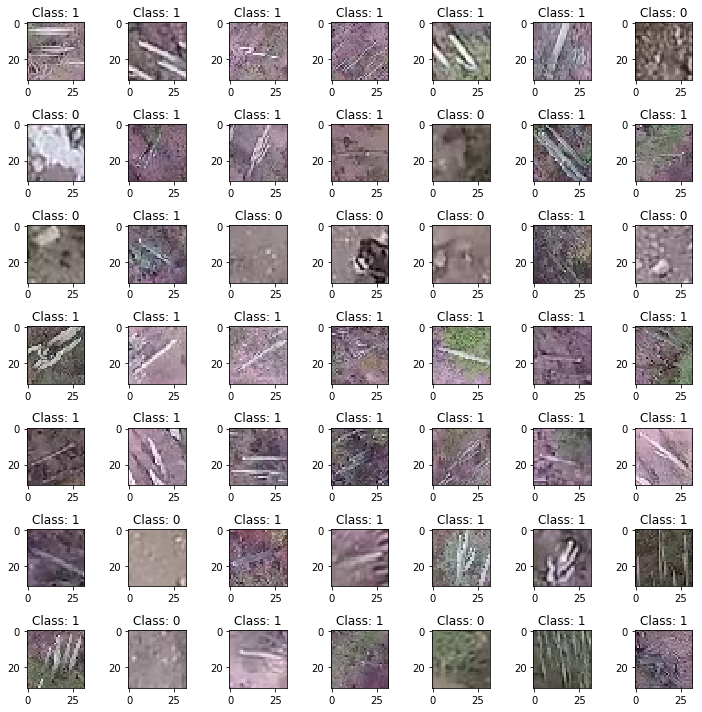

In [97]:
def plot_images_df(df, top=25):
  
  plt.figure(figsize=(10, 10))
  for idx in range(top):
    pics_per_row = int(top**.5)
    plt.subplot(pics_per_row, pics_per_row, idx + 1)

    img = mpimage.imread(os.path.join('train', df.iloc[idx].id))
    plt.imshow(img)
    plt.title('Class: {}'.format(df.iloc[idx].has_cactus))

  plt.tight_layout()

plot_images_df(df, 49)

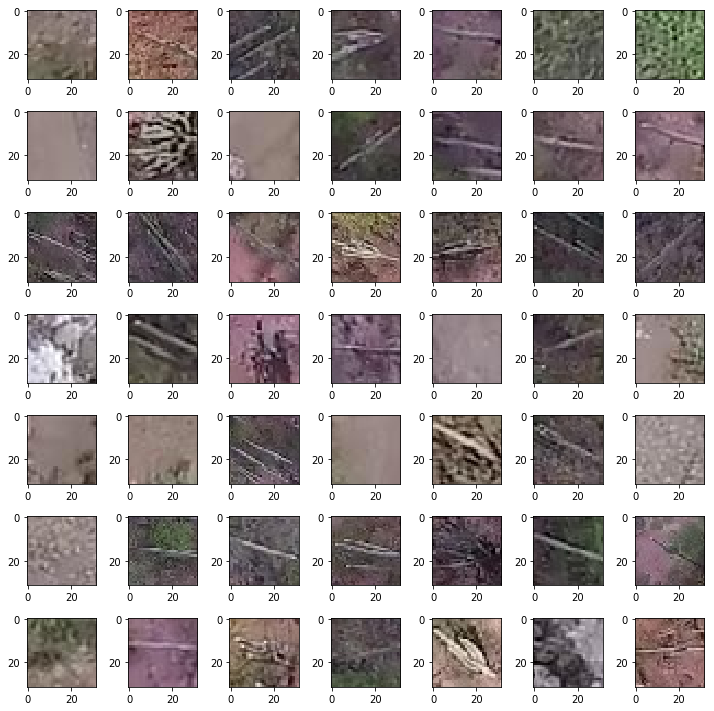

In [98]:
def plot_images(item_dir, top=25):
  
  all_items_dir = os.listdir(item_dir)
  item_files = [os.path.join(item_dir, file) for file in all_items_dir][:top]

  plt.figure(figsize=(10, 10))
  for idx, img_path in enumerate(item_files):
    pics_per_row = int(top**.5)
    plt.subplot(pics_per_row, pics_per_row, idx + 1)

    img = mpimage.imread(img_path)
    plt.imshow(img)

  plt.tight_layout()

plot_images("test", 49)

In [99]:
datagen = ImageDataGenerator(rescale=1./255)
train_generator = datagen.flow_from_dataframe(dataframe=df_train, directory="train", x_col="id", y_col="has_cactus", class_mode="binary", target_size=(32,32), batch_size=32)
validation_generator = datagen.flow_from_dataframe(dataframe=df_test, directory="train", x_col="id", y_col="has_cactus", class_mode="binary", target_size=(32,32), batch_size=32)

Found 13125 images belonging to 2 classes.
Found 4375 images belonging to 2 classes.


In [100]:
input_shape = (32, 32, 3)

model = Sequential([
    Conv2D(32, (3,3), input_shape=input_shape),
    MaxPool2D((2, 2)),
    
    Conv2D(64, (3,3)),
    MaxPool2D((2, 2)),
    
    Conv2D(256, (3,3)),
    MaxPool2D((2, 2)),
    
    Flatten(),
    
    Dense(64, activation='relu'),
    Dropout(.5),
    Dense(1, activation='sigmoid')
    
])

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 4, 4, 256)         147712    
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 2, 2, 256)         0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 1024)              0         
__________

In [101]:
history = model.fit_generator(
  train_generator,
  validation_data=validation_generator,
  steps_per_epoch=200,
  epochs=50,
  validation_steps=50,
  verbose=2)

Epoch 1/50
 - 11s - loss: 0.2634 - acc: 0.8908 - val_loss: 0.1949 - val_acc: 0.9331
Epoch 2/50
 - 10s - loss: 0.1508 - acc: 0.9461 - val_loss: 0.0846 - val_acc: 0.9688
Epoch 3/50
 - 9s - loss: 0.1226 - acc: 0.9563 - val_loss: 0.1416 - val_acc: 0.9472
Epoch 4/50
 - 8s - loss: 0.1025 - acc: 0.9609 - val_loss: 0.0659 - val_acc: 0.9738
Epoch 5/50
 - 10s - loss: 0.0922 - acc: 0.9665 - val_loss: 0.0751 - val_acc: 0.9744
Epoch 6/50
 - 9s - loss: 0.0688 - acc: 0.9741 - val_loss: 0.0927 - val_acc: 0.9661
Epoch 7/50
 - 8s - loss: 0.0659 - acc: 0.9759 - val_loss: 0.0599 - val_acc: 0.9769
Epoch 8/50
 - 8s - loss: 0.0595 - acc: 0.9794 - val_loss: 0.0699 - val_acc: 0.9781
Epoch 9/50
 - 7s - loss: 0.0490 - acc: 0.9820 - val_loss: 0.0948 - val_acc: 0.9679
Epoch 10/50
 - 7s - loss: 0.0606 - acc: 0.9788 - val_loss: 0.1725 - val_acc: 0.9587
Epoch 11/50
 - 7s - loss: 0.0478 - acc: 0.9806 - val_loss: 0.0726 - val_acc: 0.9742
Epoch 12/50
 - 8s - loss: 0.0350 - acc: 0.9877 - val_loss: 0.0665 - val_acc: 0.980

In [102]:
#model.evaluate_generator(train_generator, steps=df_train.shape[0])

In [103]:
#model.evaluate_generator(validation_generator, steps=df_test.shape[0])

In [104]:
#model.evaluate_generator(truth_generator, steps=df_truth.shape[0])

In [105]:
df_test_final = pd.DataFrame({"id": os.listdir("test")})
truth_generator = datagen.flow_from_dataframe(dataframe=df_truth, directory="test", x_col="id", y_col="has_cactus", class_mode="binary", target_size=(32,32), batch_size=200, drop_duplicates=True, seed=2019, pickle_safe = True, workers=1)
predictions = model.predict_generator(truth_generator, steps=20)



Found 4000 images belonging to 2 classes.


In [106]:
df_test_final['has_cactus'] = predictions
#df_test_final.to_csv('lkoziol_prediction.csv', index=False)
df_test_final['has_cactus'] = (df_test_final['has_cactus'] > .5).astype('int').astype('str')
#df_test_final.head()

In [111]:
dfs = pd.merge(df_test_final, df_truth, on='id')
diff = (dfs['has_cactus_x'] == dfs['has_cactus_y']).astype('int')
sum(diff.astype('int'))/len(dfs)

0.60175

In [112]:
model.evaluate_generator(truth_generator, steps=20)

[1.0461836904287338, 0.8909999936819076]

In [109]:
df_truth.shape[0]

4000